# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [2]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [3]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
x = data_df[feature_cols]
y = data_df['score']
x

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、线性回归模型构建

In [4]:
# === 训练集/测试集 8:2 随机划分 ===
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# === 训练线性回归模型 ===
model = LinearRegression()
model.fit(x_train, y_train)

# === 预测并计算 RMSE ===
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 3.2888875354885916


In [5]:
# === 6. 输出模型系数 ===
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)
coef_df


,feature,coefficient
4,influence,0.000807
1,publications,0.000540
2,citations,-0.000089
7,patents,-0.002439
6,broad_impact,-0.002703
5,quality_of_education,-0.006736
3,alumni_employment,-0.007281
0,quality_of_faculty,-0.068415


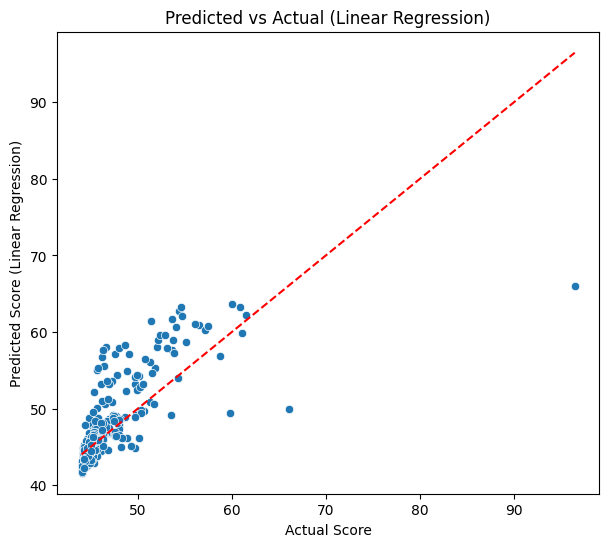

In [6]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linestyle='--'
)

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score (Linear Regression)")
plt.title("Predicted vs Actual (Linear Regression)")
plt.show()

## 五、系数解读

<div style="float:left; margin-left:10px;"> 
    
| 特征               | 系数        | 解读                      |
|:---------------- |:--------- |:----------------------- |
| **influence**    | +0.000807 | 有轻微正向关系，但影响极小           |
| **publications** | +0.000540 | 有轻微正向关系，但影响极小 |
| **citations**            | –0.000089 | 被引次数越高 score 反而下降？（不符合逻辑） |
| **patents**              | –0.0024   | 弱负向                       |
| **broad_impact**         | –0.0027   | 弱负向                       |
| **quality_of_education** | –0.0067   | 教育质量高反而降低 score？（不符合逻辑）   |
| **alumni_employment**    | –0.0073   | 校友就业好反而分差？（不符合逻辑）         |
| **quality_of_faculty**   | –0.068    | 教师质量越高 score 越低？（不符合逻辑）   |

反向系数的出现有多种可能，最直观的影响可能是特征之间并不是独立的，具有共线性， 即：

- publications ↔ citations ↔ influence → 高度相关
- quality_of_education ↔ quality_of_faculty → 高度相关

要验证这点，可以通过多重共线性分析：

In [7]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data[["feature", "VIF"]]

,feature,VIF
0,quality_of_faculty,20.102066
1,publications,27.960952
2,citations,16.664411
3,alumni_employment,8.415003
4,influence,26.444994
5,quality_of_education,19.132123
6,broad_impact,51.217845
7,patents,6.960955


**可参考：**
- VIF > 5:开始有多重共线性问题
- VIF > 10:有严重问题
- VIF > 20:极强共线性，变量冗余
- VIF > 50:矩阵几乎奇异（非常严重）

可见broad_impact与其它特征几乎是线性组合，接下来可以考虑去掉这个特征。

高度相关的publications，citations和influence的VIF也很高。
高度相关的quality_of_education，quality_of_faculty也一样。

既然很多特征高度线性相关，为什么不能把高度线性相关的特征组合成一个特征再尝试？

## 六、尝试主成分分析法（PCA）：

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# === 读取数据 ===
data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame

data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

# === 特征与目标 （这次去掉 broad_impact ） ===
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'patents']
x = data_df[feature_cols]
y = data_df['score']

# === 标准化 ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# === PCA降维 ===
# 降到4个主成分, 大概依据：
# alumni_employment
# patents
#（publications，citations，influence）
#（quality_of_education，quality_of_faculty）
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
print("解释方差占比:", pca.explained_variance_ratio_)
print("累计解释方差:", pca.explained_variance_ratio_.sum())


解释方差占比: [0.61670532 0.11449914 0.098702   0.07733163]
累计解释方差: 0.9072381027766481


In [9]:

# === 训练集/测试集 8:2 随机划分 ===
x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# === 训练线性回归模型 ===
model = LinearRegression()
model.fit(x_train_pca, y_train)

# === 预测并计算 RMSE ===
y_pred = model.predict(x_test_pca)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


# === 查看 PCA 主成分的含义 ===
loadings = pd.DataFrame(
    pca.components_,
    columns=feature_cols,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

loadings

RMSE: 3.295408636146917


,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,patents
PC1,0.363743,0.426026,0.415546,0.303687,0.422999,0.361628,0.334043
PC2,0.458449,-0.339466,-0.270903,0.346749,-0.302005,0.562439,-0.270960
PC3,-0.350046,-0.044039,-0.154089,0.765837,-0.215952,-0.199941,0.422689
PC4,0.262980,-0.134372,-0.283765,-0.412179,-0.208044,0.086999,0.781998


可见，PCA回归测试集的RMSE（3.295）与原线性回归RMSE（3.288）相差无几，尽管减少了特征数量，但模型预测能力基本保持不变。

下面对主成分含义进行解释：

<div style="float:left; margin-left:10px;"> 

| 主成分     | 含义                  | 解释方差  | 特点              |
|:------- |:------------------- |:----- |:--------------- |
| **PC1** | publications<br>citations	 <br>influence | 61.7% | 所有指标均有贡献，是最核心维度 |  
| **PC2** |  quality_of_faculty <br> quality_of_education    | 11.4% | 教学质量高 |
| **PC3** | alumni_employment         | 9.9%  | 就业强、专利强的学校      |
| **PC4** | patents          | 7.7%  | 强创新但与教学/就业弱相关   |


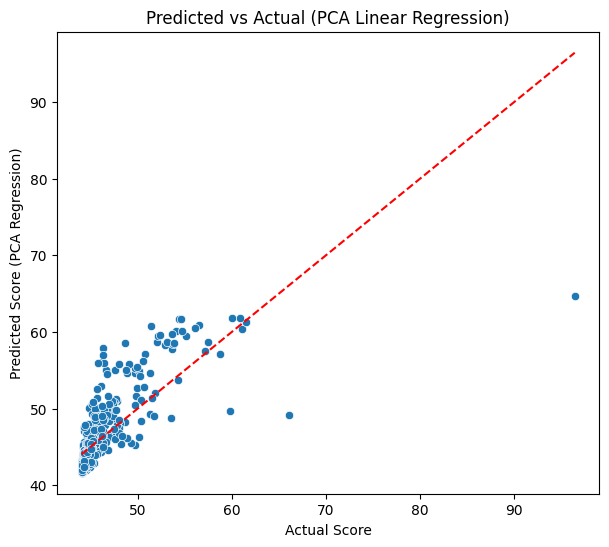

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linestyle='--'
)

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score (PCA Regression)")
plt.title("Predicted vs Actual (PCA Linear Regression)")
plt.show()

### 七、加入离散地区特征

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# === 读取数据 ===
data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame

data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

# === 特征与目标 （这次去掉 broad_impact ） ===
numeric_features = [
    "quality_of_education",
    "alumni_employment",
    "quality_of_faculty",
    "publications",
    "influence",
    "citations",
    "broad_impact",
    "patents"
]

categorical_features = ["region"]

X = data_df[numeric_features + categorical_features]
y = data_df["score"]

# === One-hot Encoding ===
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder='passthrough'  # keep numeric features
)

# ---------------------
# 建立线性回归流水线
# ---------------------
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('reg', LinearRegression())
])

# ---------------------
# Train-test split（与之前保持 8:2）
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------
# 训练
# ---------------------
model.fit(X_train, y_train)

# ---------------------
# 预测 & RMSE
# ---------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE with region:", rmse)

# ---------------------
# 提取系数（含地区）
# ---------------------
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
region_encoded_names = ohe.get_feature_names_out(categorical_features)

feature_names = list(region_encoded_names) + numeric_features
coef = model.named_steps["reg"].coef_

coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coef})
print("\nCoefficients including region:")
coef_df


Test RMSE with region: 3.343857013380318

Coefficients including region:


,feature,coefficient
0,region_Australia,-0.146729
1,region_Austria,-1.484958
2,region_Belgium,-2.318956
3,region_Brazil,1.173770
4,region_Bulgaria,0.653374
...,...,...
61,publications,0.001645
62,influence,-0.000354
63,citations,-0.000015
64,broad_impact,-0.003468


加入地区特征以后，RMSE（3.344）和未加入之前RMSE（3.288）下降不多，变化不大，说明地区信息作用不明显。